In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [9]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values.astype('float32')

# Normalizar el dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [10]:
# Crear datos secuenciales para la red neuronal
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(data, time_step)

In [11]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Redimensionar los datos para la RNN (requiere 3 dimensiones)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Feed Forward Neural Network (FNN)

In [12]:
# Modelo FNN mejorado
model_fnn_improved = Sequential()
model_fnn_improved.add(Dense(128, input_dim=time_step, activation='relu'))
model_fnn_improved.add(Dense(64, activation='relu'))
model_fnn_improved.add(Dense(32, activation='relu'))
model_fnn_improved.add(Dense(16, activation='relu'))
model_fnn_improved.add(Dense(1, activation='linear'))

# Compilar el modelo
model_fnn_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el modelo
history_fnn_improved = model_fnn_improved.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Evaluar el modelo
mse_fnn_improved = model_fnn_improved.evaluate(X_test, Y_test, verbose=0)
print(f'MSE de la FNN: {mse_fnn_improved}')

Epoch 1/100


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0318 - val_loss: 0.0050
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_

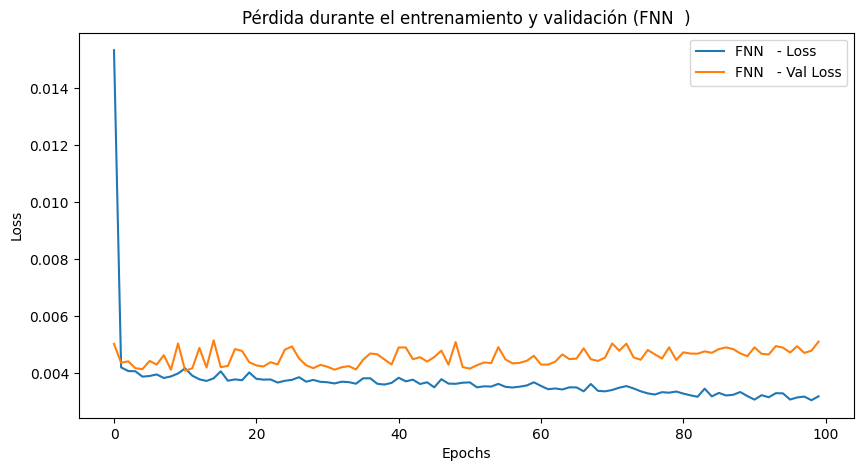

In [17]:
# Graficar la pérdida del entrenamiento y validación para el modelo mejorado
plt.figure(figsize=(10, 5))
plt.plot(history_fnn_improved.history['loss'], label='FNN   - Loss')
plt.plot(history_fnn_improved.history['val_loss'], label='FNN   - Val Loss')
plt.title('Pérdida durante el entrenamiento y validación (FNN  )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Recurrent Neural Network (RNN)

In [14]:
# Modelo RNN mejorado
model_rnn_improved = Sequential()
model_rnn_improved.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model_rnn_improved.add(LSTM(50, return_sequences=False))
model_rnn_improved.add(Dense(25, activation='relu'))
model_rnn_improved.add(Dense(1, activation='linear'))

# Compilar el modelo
model_rnn_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenar el modelo
history_rnn_improved = model_rnn_improved.fit(X_train_rnn, Y_train, epochs=100, batch_size=32, validation_data=(X_test_rnn, Y_test), verbose=1)

# Evaluar el modelo
mse_rnn_improved = model_rnn_improved.evaluate(X_test_rnn, Y_test, verbose=0)
print(f'MSE de la RNN  : {mse_rnn_improved}')


Epoch 1/100


/Users/carloslopez/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0179 - val_loss: 0.0069
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0040 - val_l

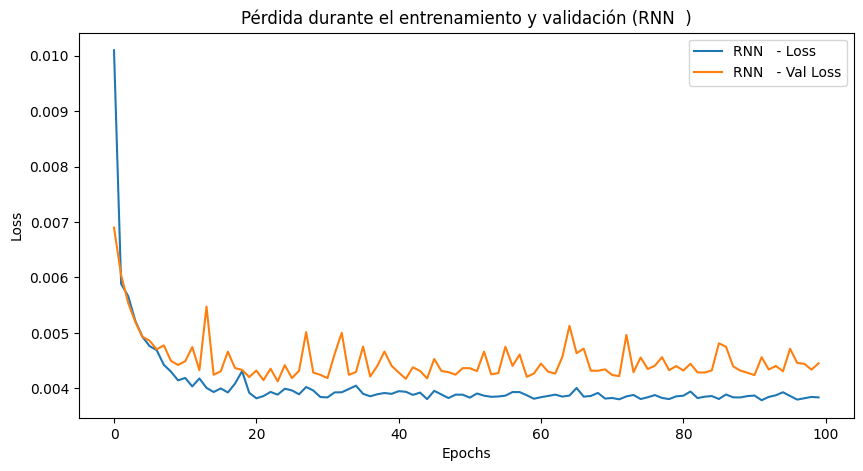

In [19]:
# Graficar la pérdida del entrenamiento y validación para el modelo mejorado
plt.figure(figsize=(10, 5))
plt.plot(history_rnn_improved.history['loss'], label='RNN   - Loss')
plt.plot(history_rnn_improved.history['val_loss'], label='RNN   - Val Loss')
plt.title('Pérdida durante el entrenamiento y validación (RNN  )')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Comparacion 

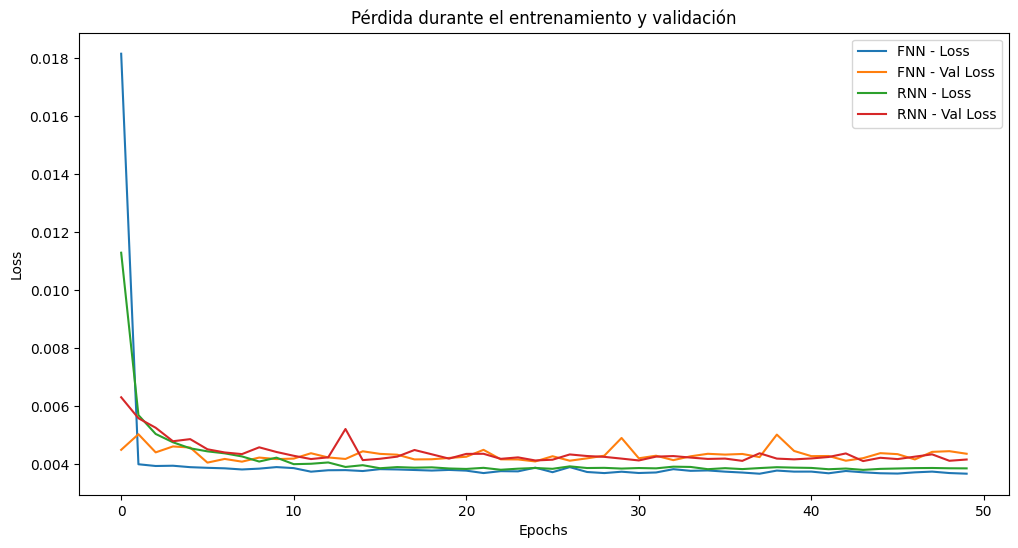

In [18]:
# Graficar la pérdida del entrenamiento y validación para ambos modelos
plt.figure(figsize=(12, 6))
plt.plot(history_fnn.history['loss'], label='FNN - Loss')
plt.plot(history_fnn.history['val_loss'], label='FNN - Val Loss')
plt.plot(history_rnn.history['loss'], label='RNN - Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN - Val Loss')
plt.title('Pérdida durante el entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
